<a href="https://colab.research.google.com/github/janepu47/229352/blob/main/%E0%B8%AA%E0%B8%B3%E0%B9%80%E0%B8%99%E0%B8%B2%E0%B8%82%E0%B8%AD%E0%B8%87_Lab05_decision_tree_bagging_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [ ]:
import pandas as pd
import graphviz

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import data
data = pd.read_csv("heart_disease.csv", na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [ ]:

# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [ ]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [ ]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=3)

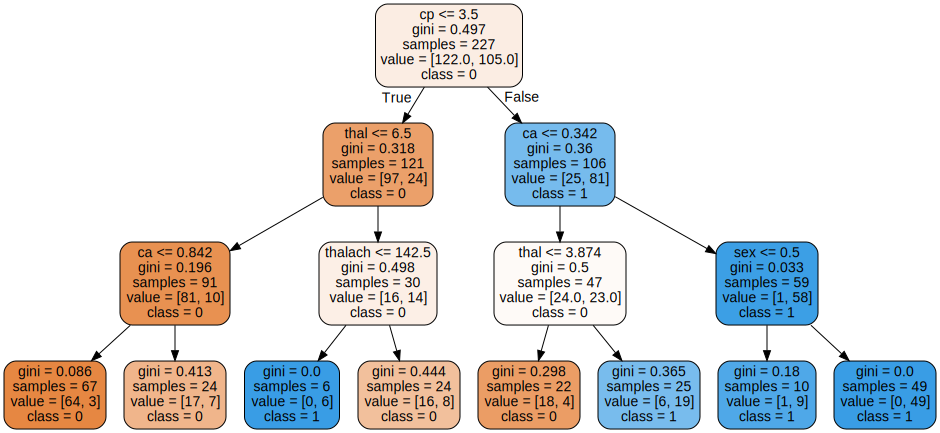

In [ ]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import classification_report
bagged_trees = BaggingClassifier(estimator=clf, n_estimators=100, max_samples=0.8)
bagged_trees.fit(X_train, y_train)

print(classification_report(y_test, bagged_trees.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        42
           1       0.75      0.71      0.73        34

    accuracy                           0.76        76
   macro avg       0.76      0.76      0.76        76
weighted avg       0.76      0.76      0.76        76



## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

In [ ]:
forest = RandomForestClassifier(n_estimators= 200, max_depth= 6)
forest.fit(X_train, y_train)
print(classification_report(y_test, forest.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        42
           1       0.84      0.76      0.80        34

    accuracy                           0.83        76
   macro avg       0.83      0.82      0.83        76
weighted avg       0.83      0.83      0.83        76



#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

####Dicision tree

In [ ]:
from sklearn.metrics import f1_score, accuracy_score

dt_pipe = Pipeline([
    ('classifier', DecisionTreeClassifier())
])

dt_params = {
    'classifier__max_depth': [3, 5, 7, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__criterion': ['gini', 'entropy']
}

dt_grid = GridSearchCV(dt_pipe, dt_params, cv=5, scoring='f1_macro')
dt_grid.fit(X_train, y_train)

best_dt = dt_grid.best_estimator_
y_pred = best_dt.predict(X_test)
dt_f1 = f1_score(y_test, y_pred, average='macro')
dt_acc = accuracy_score(y_test, y_pred)

print(f"Decision Tree - พารามิเตอร์ที่ดีที่สุด: {dt_grid.best_params_}")
print(f"F1 Macro: {dt_f1:.4f}")
print(f'accuracy: {dt_acc:.4f}')

Decision Tree - พารามิเตอร์ที่ดีที่สุด: {'classifier__criterion': 'entropy', 'classifier__max_depth': 3, 'classifier__min_samples_split': 2}
F1 Macro: 0.7425
accuracy: 0.7500


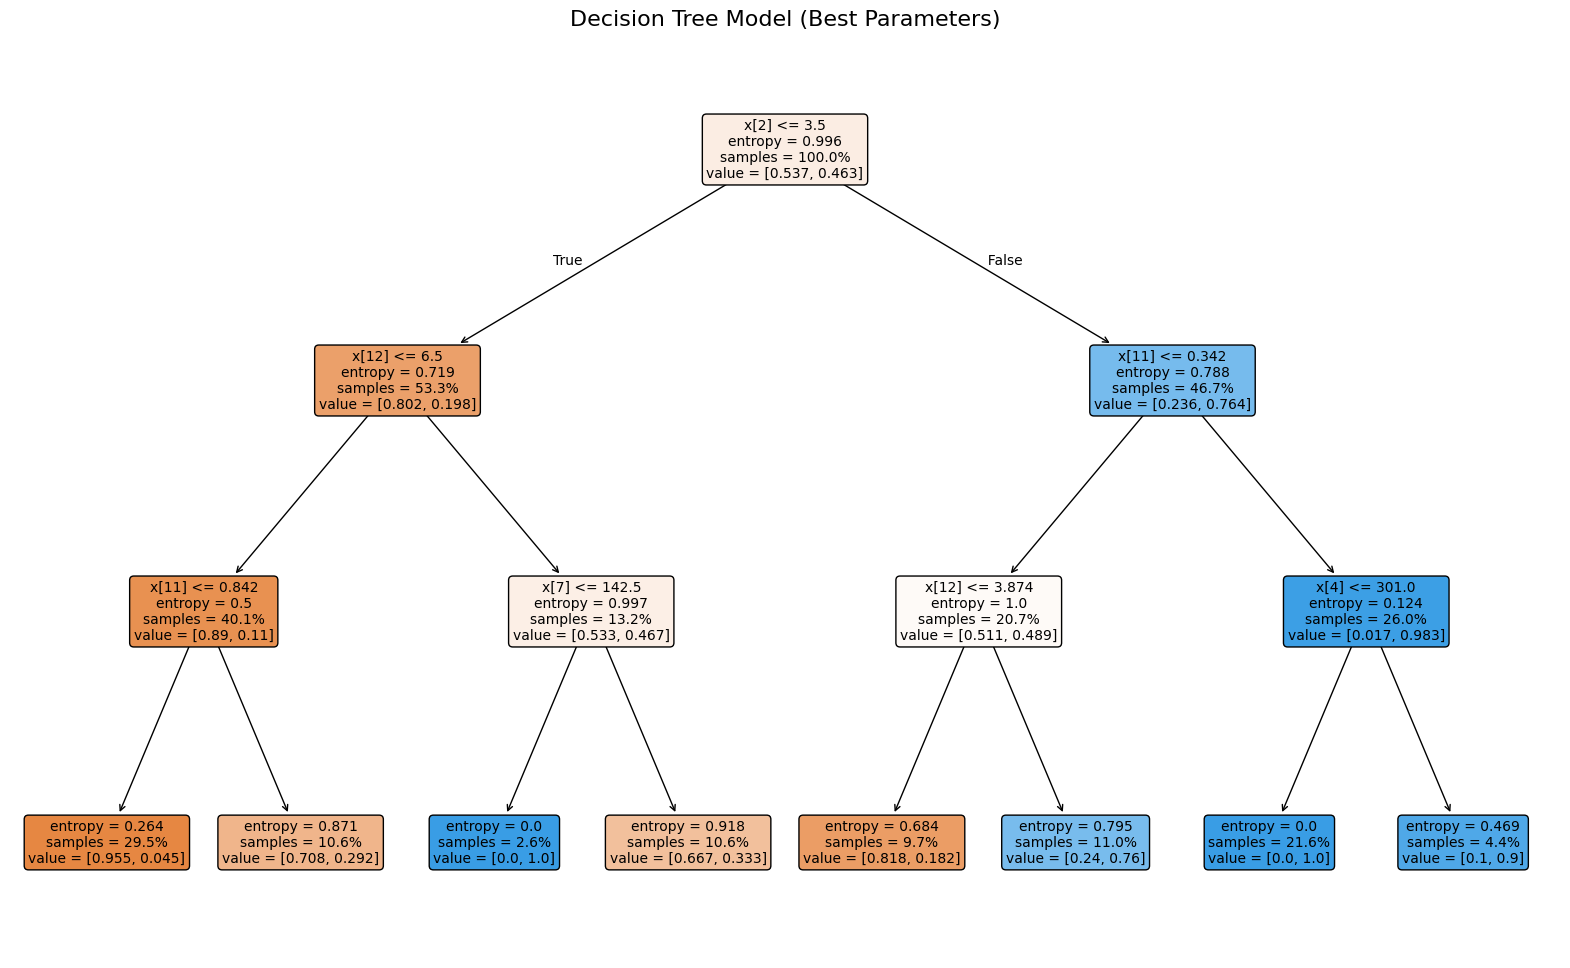

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 12))

plot_tree(best_dt.named_steps['classifier'],
          filled=True,
          rounded=True,
          proportion=True,
          fontsize=10)

plt.title("Decision Tree Model (Best Parameters)", fontsize=16)
plt.show()

- Tree Depth เลือก 3 เพราะป้องกัน overfitting,
- Minimum Samples to Split เลือก 2 เพราะสร้างโหนดย่อยได้ง่าย,
- Splitting Rule เลือก entropy เพราะหาจุดแบ่งได้ดีที่สุด


####Bagged Trees

In [ ]:
bag_pipe = Pipeline([
    ('classifier', BaggingClassifier())
])

bag_params = {
    'classifier__n_estimators': [10, 50, 100],
    'classifier__max_samples': [0.5, 0.8, 1.0],
    'classifier__bootstrap': [True, False]
}

bag_grid = GridSearchCV(bag_pipe, bag_params, cv=5, scoring='f1_macro')
bag_grid.fit(X_train, y_train)

best_bag = bag_grid.best_estimator_
y_pred = best_bag.predict(X_test)
bag_f1 = f1_score(y_test, y_pred, average='macro')
bag_acc = accuracy_score(y_test, y_pred)

print(f"Bagged Trees - พารามิเตอร์ที่ดีที่สุด: {bag_grid.best_params_}")
print(f"F1 Macro: {bag_f1:.4f}")
print(f"accuracy: {bag_acc:.4f}")

Bagged Trees - พารามิเตอร์ที่ดีที่สุด: {'classifier__bootstrap': True, 'classifier__max_samples': 0.5, 'classifier__n_estimators': 50}
F1 Macro: 0.7479
accuracy: 0.7500


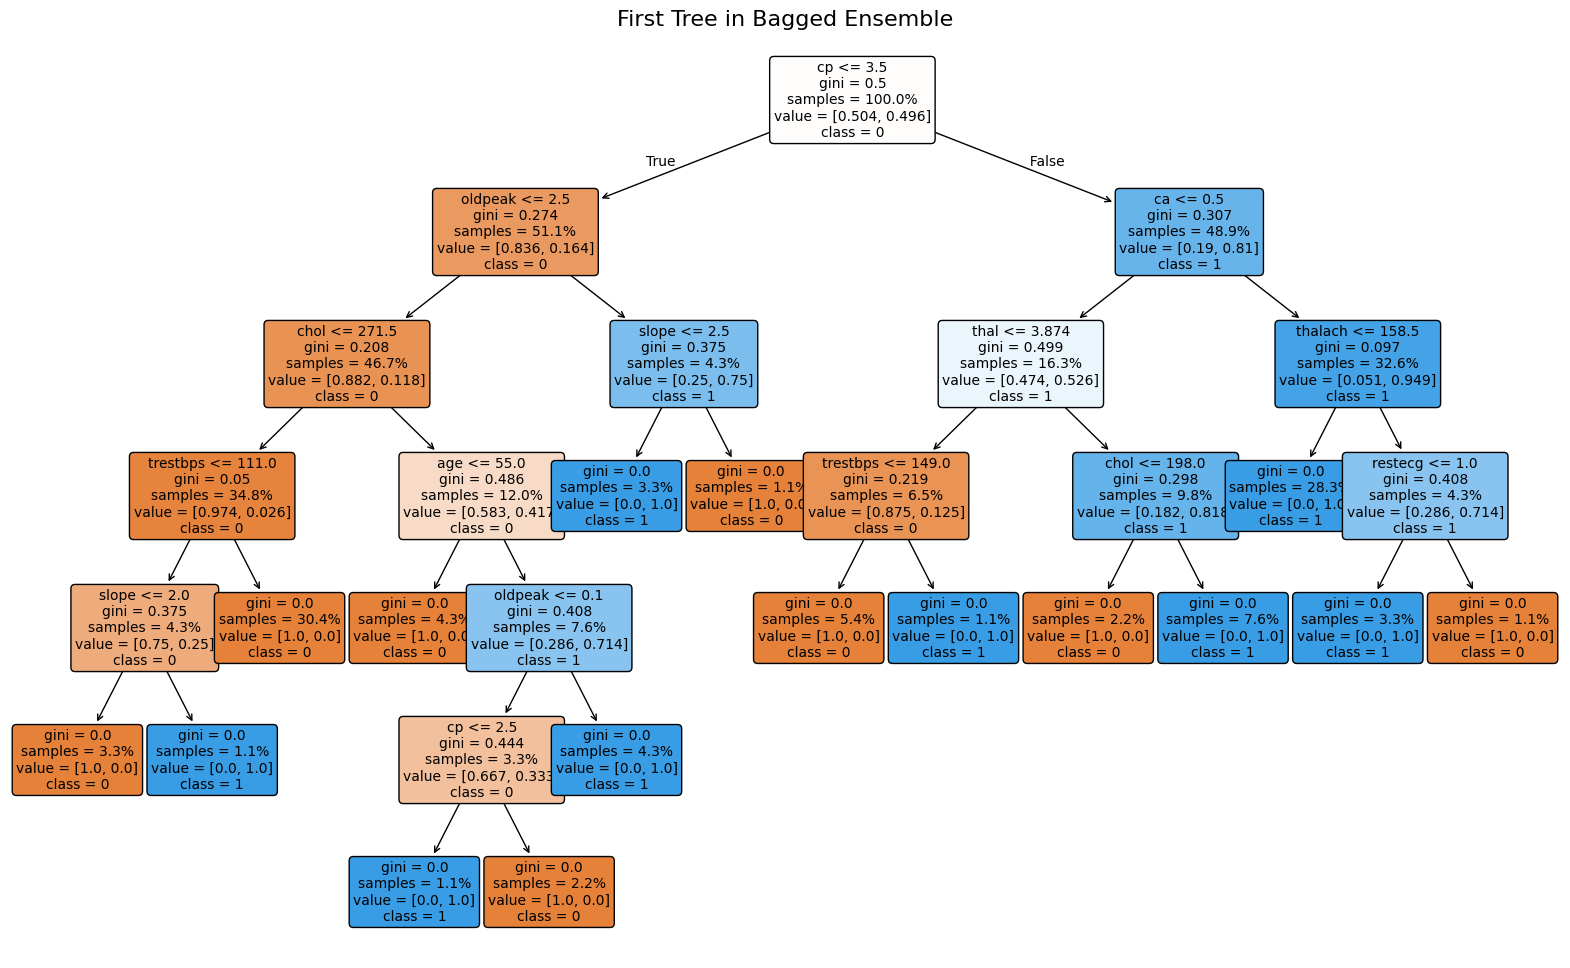

In [ ]:
plt.figure(figsize=(20, 12))

first_tree = best_bag.named_steps['classifier'].estimators_[0]

plot_tree(first_tree,
          filled=True,
          rounded=True,
          proportion=True,
          fontsize=10,
          feature_names=X.columns.tolist(), # Use feature names from the original X
          class_names=['0', '1']) # Assuming binary classification with classes 0 and 1

plt.title("First Tree in Bagged Ensemble", fontsize=16)
plt.show()

- n_estimators ค่าที่ทดสอบ: 10, 50, 100 เลือก n_estimators ที่ไม่มากเกินไป (ไม่ช้า) แต่ไม่น้อยจนโมเดลไม่เสถียร
- max_samples ค่าที่ทดสอบ: 50%, 80%, 100%
- bootstrap ค่าที่ทดสอบ: True, False ช่วยให้แต่ละtreeไม่เหมือนกัน

####Random Forest

In [ ]:
rf_pipe = Pipeline([
    ('classifier', RandomForestClassifier())
])

rf_params = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_features': ['sqrt', 'log2', None],
    'classifier__min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(rf_pipe, rf_params, cv=5, scoring='f1_macro')
rf_grid.fit(X_train, y_train)

best_rf = rf_grid.best_estimator_
y_pred = best_rf.predict(X_test)
rf_f1 = f1_score(y_test, y_pred, average='macro')
rf_acc = accuracy_score(y_test, y_pred)

print(f"Random Forest - พารามิเตอร์ที่ดีที่สุด: {rf_grid.best_params_}")
print(f"F1 Macro: {rf_f1:.4f}")
print(f"accuracy: {rf_acc:.4f}")

Random Forest - พารามิเตอร์ที่ดีที่สุด: {'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 4, 'classifier__n_estimators': 50}
F1 Macro: 0.7590
accuracy: 0.7632


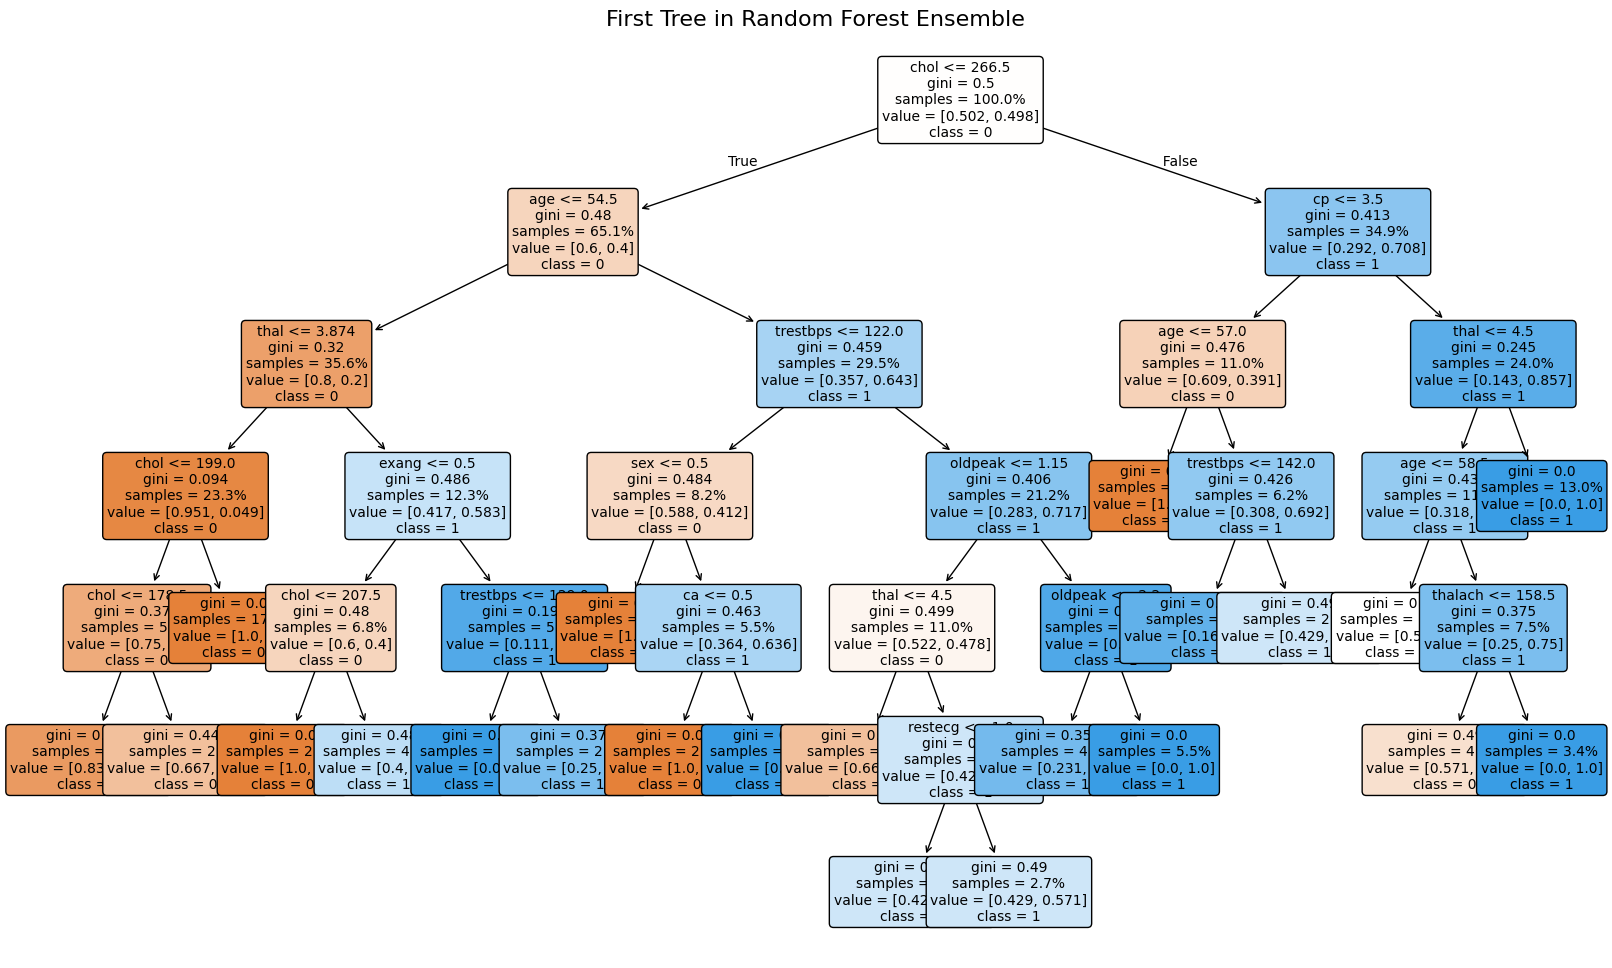

In [ ]:
plt.figure(figsize=(20, 12))

first_rf_tree = best_rf.named_steps['classifier'].estimators_[0]

plot_tree(first_rf_tree,
          filled=True,
          rounded=True,
          proportion=True,
          fontsize=10,
          feature_names=X.columns.tolist(),
          class_names=['0', '1'])

plt.title("First Tree in Random Forest Ensemble", fontsize=16)
plt.show()

- n_estimators ค่าที่ทดสอบ: 50, 100, 200 ต้น
- max_features ทำให้แต่ละtreeใช้ฟีเจอร์ต่างกัน
- min_samples_leaf ช่วยป้องกัน Overfitting


In [ ]:
import pandas as pd
results = {
    'model': ['Decision Tree', 'Bagged Trees', 'Random Forest'],
    'F1 Macro': [dt_f1, bag_f1, rf_f1],
    'accuracy': [dt_acc, bag_acc, rf_acc]
}
print(pd.DataFrame(results))

           model  F1 Macro  accuracy
0  Decision Tree  0.742465  0.750000
1   Bagged Trees  0.747861  0.750000
2  Random Forest  0.758985  0.763158
